In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv("./Default.csv")
print(data.shape)
data.head()


(10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [30]:
b = data[data.default=="No"].sample(frac=0.1)
r = data[data.default=="Yes"]


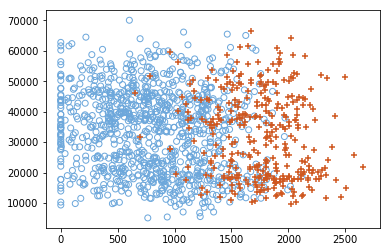

In [31]:
plt.scatter(b.balance,b.income,facecolors='none',edgecolors='#6CA7DB')
plt.scatter(r.balance,r.income,c='#CF571F',marker='+')

/home/mauro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Income')

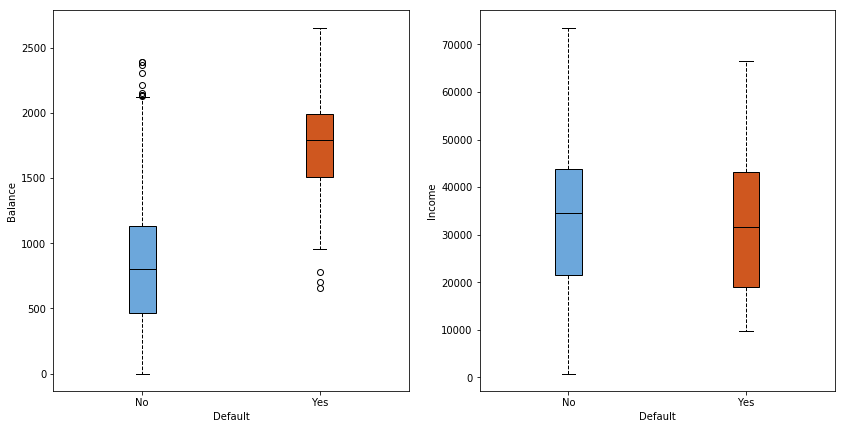

In [32]:

labels = ['No','Yes']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

medianlineprops = dict( color='black')
whiskerprops = dict(linestyle = '--')

# rectangular box plot
bplot1 = axes[0].boxplot([ data[data.default=="No"].balance,r.balance],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot([ data[data.default=="No"].income,r.income],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[1].set_title('Notched box plot')

# fill with colors
colors = ['#6CA7DB', '#CF571F']

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    
    ax.set_xlabel('Default')
#     ax.set_ylabel('Observed values')

axes[0].set_ylabel("Balance")
axes[1].set_ylabel("Income")

In [33]:
x = data.balance
y = data.default
y[y=="Yes"] =1 
y[y=="No"] =0

x = x.reshape(-1,1)
y = y.reshape(-1,1)
y=y.astype('int')
x=x.astype('float')

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is depr

In [34]:

clf = LogisticRegression()
clf.fit(x, y)


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

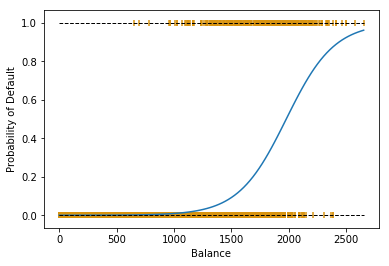

In [35]:
xs = np.linspace(min(x),max(x),100)
ys=clf.predict_proba(xs.reshape(-1,1)) 
plt.scatter(x,y,c='#D99410',marker='|')
plt.plot(xs,ys[:,1])
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.plot([min(xs),max(xs)],[0,0],linestyle="--",c='black',linewidth=1)
plt.plot([min(xs),max(xs)],[1,1],linestyle="--",c='black',linewidth=1)

In [36]:
data['studentBin'] = list(map(lambda x: 1 if x=="Yes" else 0,data['student']))
data.head()


,Unnamed: 0,default,student,balance,income,studentBin
0,1,0,No,729.526495,44361.625074,0
1,2,0,Yes,817.180407,12106.134700,1
2,3,0,No,1073.549164,31767.138947,0
3,4,0,No,529.250605,35704.493935,0
4,5,0,No,785.655883,38463.495879,0


In [37]:
x = data[['balance','studentBin']]
y = data.default
y[y=="Yes"] =1 
y[y=="No"] =0

y = y.reshape(-1,1)
y=y.astype('int')


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [38]:
x.head()

,balance,studentBin
0,729.526495,0
1,817.180407,1
2,1073.549164,0
3,529.250605,0
4,785.655883,0


In [39]:

clf = LogisticRegression()
clf.fit(x, y)

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'Probability of Default')

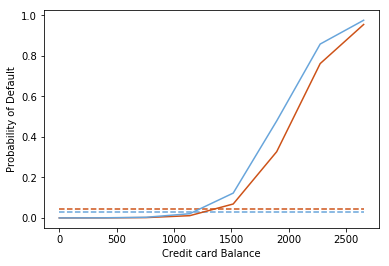

In [40]:
xs = np.linspace(min(x.balance),max(x.balance),8)
stud =  clf.predict_proba(np.array([xs,np.ones(len(xs))  ]).transpose()) 
nstud = clf.predict_proba(np.array([xs,np.ones(len(xs))-1]).transpose()) 
plt.plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==1].default),c='#CD5218',linestyle='--')
plt.plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==0].default),c='#68A5DB',linestyle='--')
plt.plot(xs,stud[:,1],c='#CD5218',)
plt.plot(xs,nstud[:,1],c='#68A5DB')
plt.xlabel("Credit card Balance")
plt.ylabel("Probability of Default")


/home/mauro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'Student status')

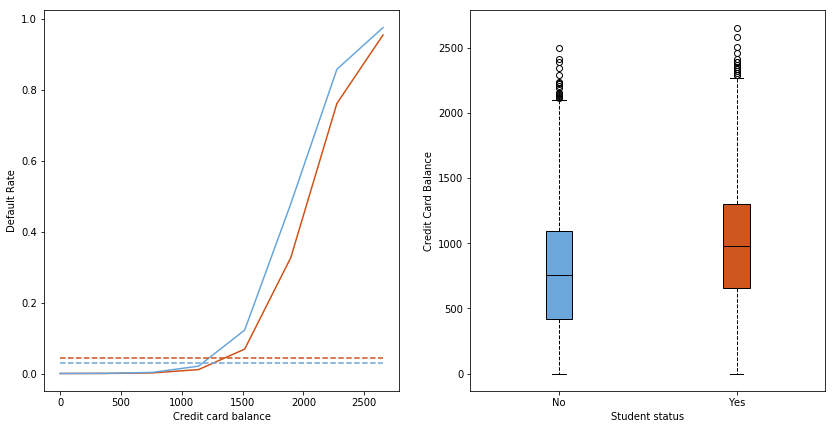

In [41]:

labels = ['No','Yes']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

medianlineprops = dict( color='black')
whiskerprops = dict(linestyle = '--')

# rectangular box plot
bplot1 = axes[0].plot(xs,stud[:,1],c='#CD5218',)
axes[0].plot(xs,nstud[:,1],c='#68A5DB')
axes[0].plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==1].default),c='#CD5218',linestyle='--')
axes[0].plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==0].default),c='#68A5DB',linestyle='--')

# notch shape box plot
bplot2 = axes[1].boxplot([ data[data.student=="No"].balance,data[data.student=="Yes"].balance],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[1].set_title('Notched box plot')

# fill with colors
colors = ['#6CA7DB', '#CF571F']

for bplot in [bplot2]:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines


axes[0].set_ylabel("Default Rate")
axes[1].set_ylabel("Credit Card Balance")


axes[0].set_xlabel("Credit card balance")
axes[1].set_xlabel("Student status")

In [42]:
data.head()


,Unnamed: 0,default,student,balance,income,studentBin
0,1,0,No,729.526495,44361.625074,0
1,2,0,Yes,817.180407,12106.134700,1
2,3,0,No,1073.549164,31767.138947,0
3,4,0,No,529.250605,35704.493935,0
4,5,0,No,785.655883,38463.495879,0


In [43]:
all_train, all_test= train_test_split(data,test_size = 0.25)

In [44]:
features = ['balance']
print(features)
y_train = np.array(all_train['default'])
y_test = np.array(all_test['default'])
y_train= y_train.astype('int')
y_test= y_test.astype('int')

['balance']


In [45]:
clf = LogisticRegression()
clf.fit(all_train[features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
preds = clf.predict(all_test[features])

In [47]:
def confMatrix(real,predicted):
    rp = 0
    rn = 0
    fp = 0
    fn = 0
    for i in range(len(real)):
            if(real[i]==0):
                if predicted[i]==0:
                    rn +=1
                else:
                    fp+=1
            else:
                if predicted[i]==0:
                    fn+=1
                else:
                    rp+=1
    confMatr = np.array([np.array([rp,fp]),np.array([fn,rn])])
    print(confMatr)
 

In [50]:
print('Conf. matrix on trainning data:')
confMatrix(y_train,clf.predict(all_train[features]))
print('Conf. matrix on test data:')
confMatrix(y_test,preds)

Conf. matrix on trainning data:
[[  52   14]
 [ 190 7244]]
Conf. matrix on test data:
[[  12    3]
 [  79 2406]]


Dada la matriz de confusión, es claro que el algoritmo NO es muy bueno para clasificar los verdaderos negativos pero muy malo en clasificar los verdaderos positivos. Es probable que esto se de porque el conjunto de entrenamiento esta altamente sesgado a los valores de default='No'.

**No es bueno para predecir default.**

# Market data

In [51]:
dataMarket = pd.read_csv('./Smarket.csv')
dataMarket['dirBin'] = list(map(lambda x: 1 if x=="Up" else 0,dataMarket.Direction))
dataMarket.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,dirBin
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [52]:
all_train = dataMarket[dataMarket.Year<=2004]
all_test = dataMarket[dataMarket.Year>2004]

In [53]:
features = all_train.columns[1:-3]
print(features)
y_train = np.array(all_train['dirBin'])
y_test = np.array(all_test['dirBin'])
y_train= y_train.astype('int')
y_test= y_test.astype('int')

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')


In [54]:
clf = LogisticRegression()
clf.fit(all_train[features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
preds = clf.predict(all_test[features])

In [57]:
print('Conf. matrix on trainning data:')
confMatrix(y_train,clf.predict(all_train[features]))
print('Conf. matrix on test data:')
confMatrix(y_test,preds)


Conf. matrix on trainning data:
[[350 316]
 [157 175]]
Conf. matrix on test data:
[[48 36]
 [93 75]]


El algoritmo solo logra clasificar 2/3 de Dirección 'Down' y 1/3 de Dirección 'Up'. 

**No es bueno para predecir dirección.**